In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns 

In [8]:
df = pd.read_excel('Data/Output/Modeling Data2.xlsx')
df.head()

,FIPSYearKey,Year,Mortality,Obesity Prevalence,Physical Act,Smoking,Alcohol,Fast Food,Poverty
0,12125-2011,2011,470.254751,37.9,66.090,28.83,7.0,12.997141,25.3
1,12125-2009,2009,463.336670,35.9,66.020,31.73,6.5,13.713659,26.5
2,12125-2007,2007,457.326560,36.4,66.380,32.16,6.8,13.580498,21.5
3,28089-2007,2007,357.763612,27.9,74.875,22.92,6.9,99.435786,12.7
4,28089-2009,2009,354.174485,28.7,75.055,21.70,7.6,95.599214,12.7


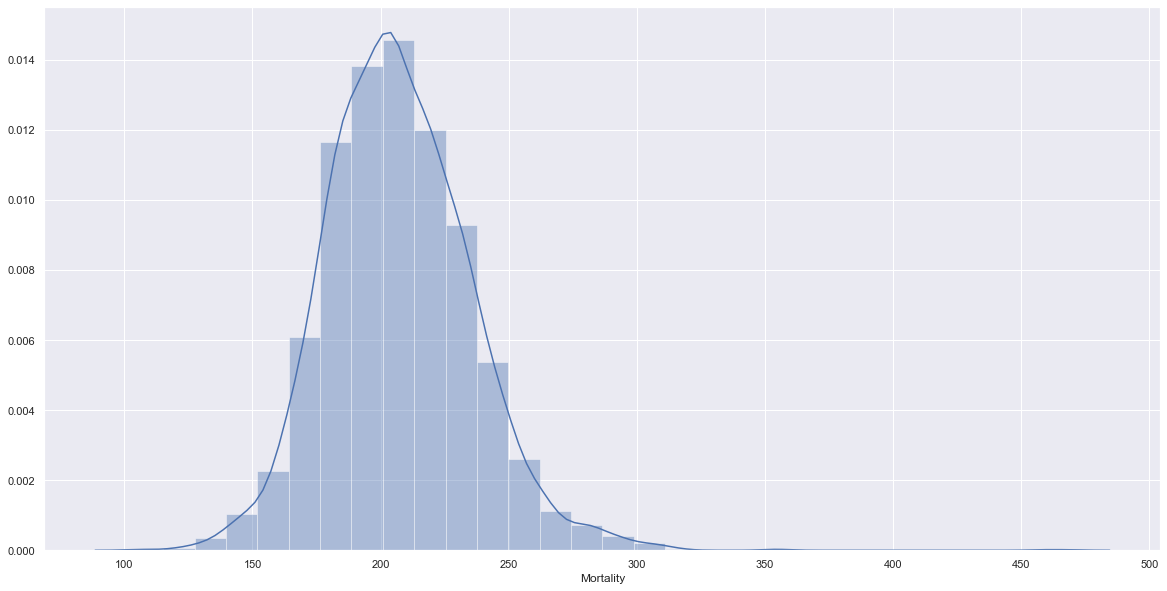

In [9]:
sns.set(rc={'figure.figsize':(20,10)})
sns.distplot(df['Mortality'], bins=30)
plt.show()

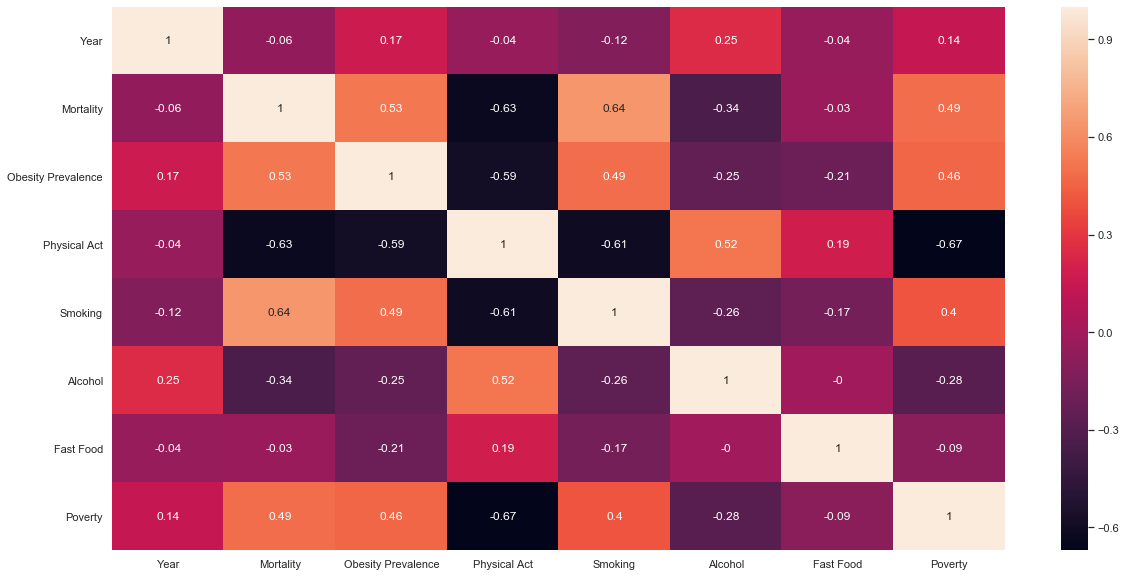

In [10]:
correlation_matrix = df.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)

In [11]:
X = df[["Obesity Prevalence","Smoking","Fast Food","Physical Act","Poverty", "Alcohol"]]
y = df["Mortality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(8466, 6) (8466, 1)


In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train shape : ", X_train.shape) 
print("X_test shape  : ", X_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape) 

X_train shape :  (6349, 6)
X_test shape  :  (2117, 6)
y_train shape :  (6349, 1)
y_test shape  :  (2117, 1)


In [13]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [166.46944176]
Coefficients: 
 [[ 1.24517954  2.85674931  0.11152996 -1.04385952  0.49525941 -0.7340646 ]]


In [14]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5365783959194668
Testing Score: 0.5581231858941932


In [15]:
from sklearn.metrics import mean_squared_error, r2_score
predicted = model.predict(X_test)
mse = mean_squared_error(y_test, predicted)
r2 = r2_score(y_test, predicted)
print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2 ): {r2}")

Mean Squared Error (MSE): 376.12051403516233
R-squared (R2 ): 0.5581231858941932


Text(0.5, 1.0, 'Residual Plot')

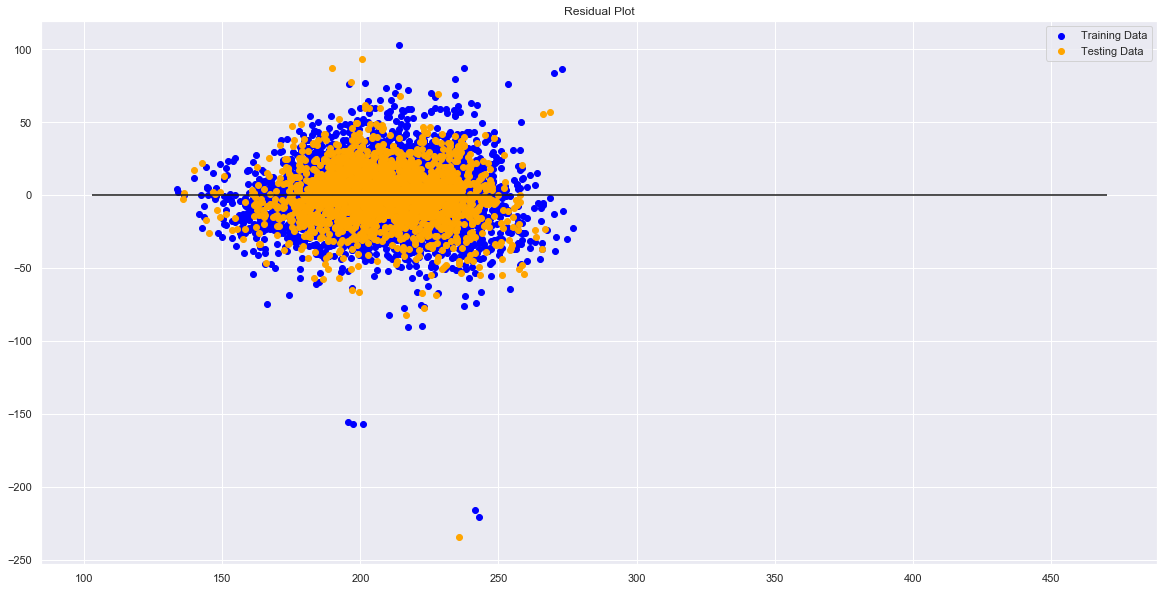

In [16]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")

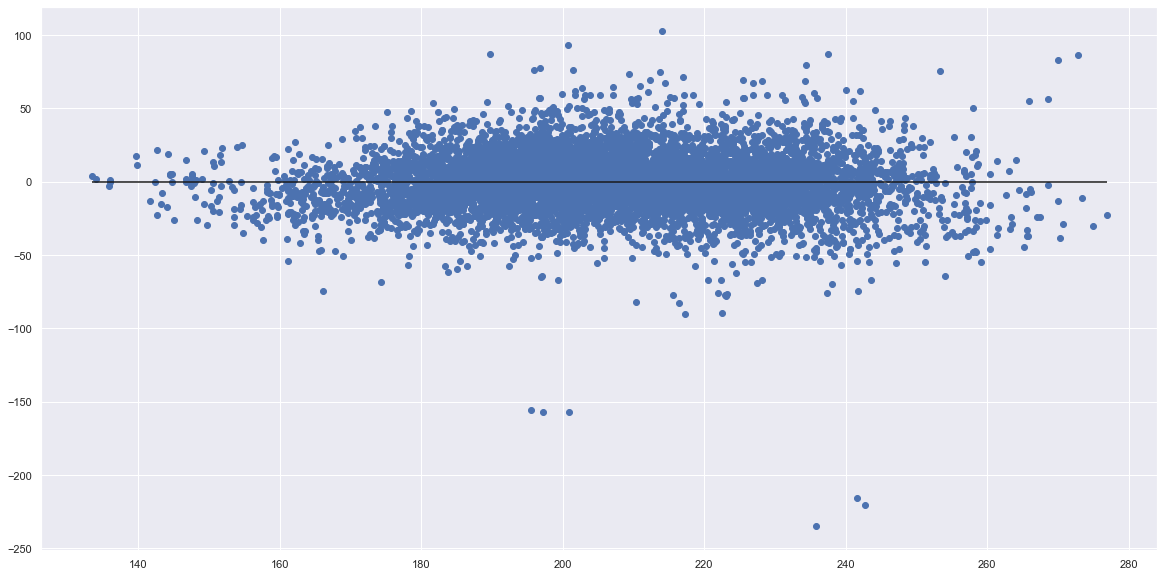

In [17]:
predictions = model.predict(X)
# Plot Residuals
plt.scatter(predictions, predictions - y)
plt.hlines(y=0, xmin=predictions.min(), xmax=predictions.max())
plt.show()

In [18]:
X = df[["Obesity Prevalence","Smoking","Poverty"]]
y = df["Mortality"].values.reshape(-1, 1)
print(X.shape, y.shape)

(8466, 3) (8466, 1)


In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
print("X_train shape : ", X_train.shape) 
print("X_test shape  : ", X_test.shape) 
print("y_train shape : ", y_train.shape) 
print("y_test shape  : ", y_test.shape)

X_train shape :  (6349, 3)
X_test shape  :  (2117, 3)
y_train shape :  (6349, 1)
y_test shape  :  (2117, 1)


In [20]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
print('Intercept: \n', model.intercept_)
print('Coefficients: \n', model.coef_)

Intercept: 
 [66.86300394]
Coefficients: 
 [[1.47333989 3.28373085 0.92622144]]


In [21]:
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)
print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.5001168224877575
Testing Score: 0.5180600204829056


Text(0.5, 1.0, 'Residual Plot')

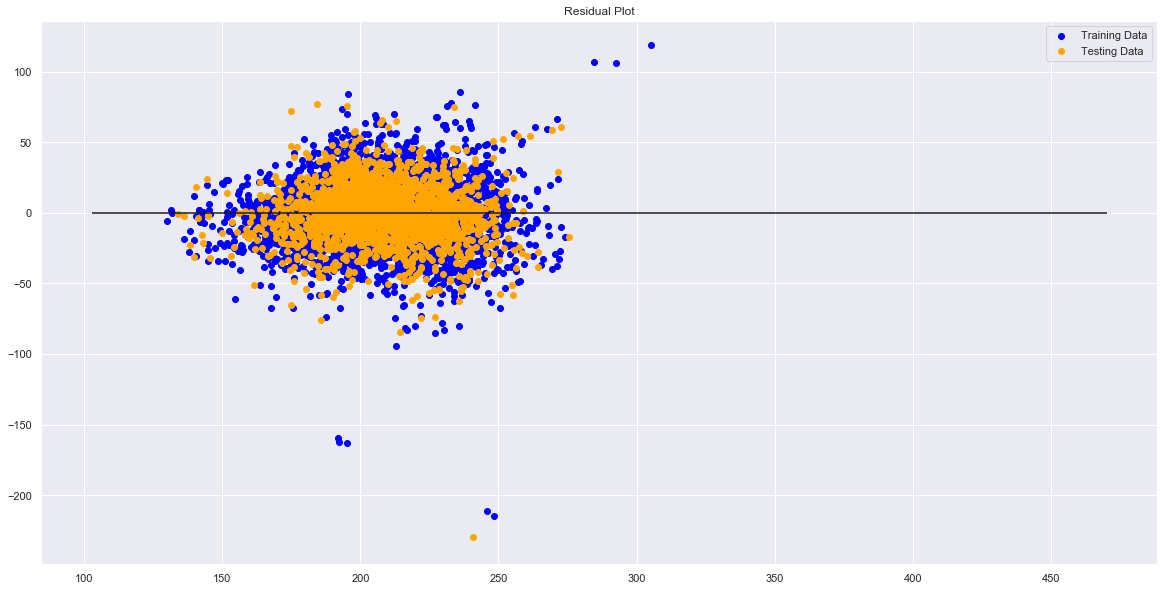

In [22]:
plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")